In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [3]:
diseases = os.listdir(train_dir)
print("Total classes are (this includes both healthy and disease classes): {}".format(len(diseases)))

Total classes are (this includes both healthy and disease classes): 38


In [4]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print(f"Unique Plants are: \n{plants}")
print("Number of plants: {}".format(len(plants)))
print("Number of diseases: {}".format(NumberOfDiseases))

Unique Plants are: 
['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
Number of plants: 14
Number of diseases: 26


In [5]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920
Tomato___Septoria_leaf_spot,1745


Text(0.5, 1.0, 'Images per each class of plant disease')

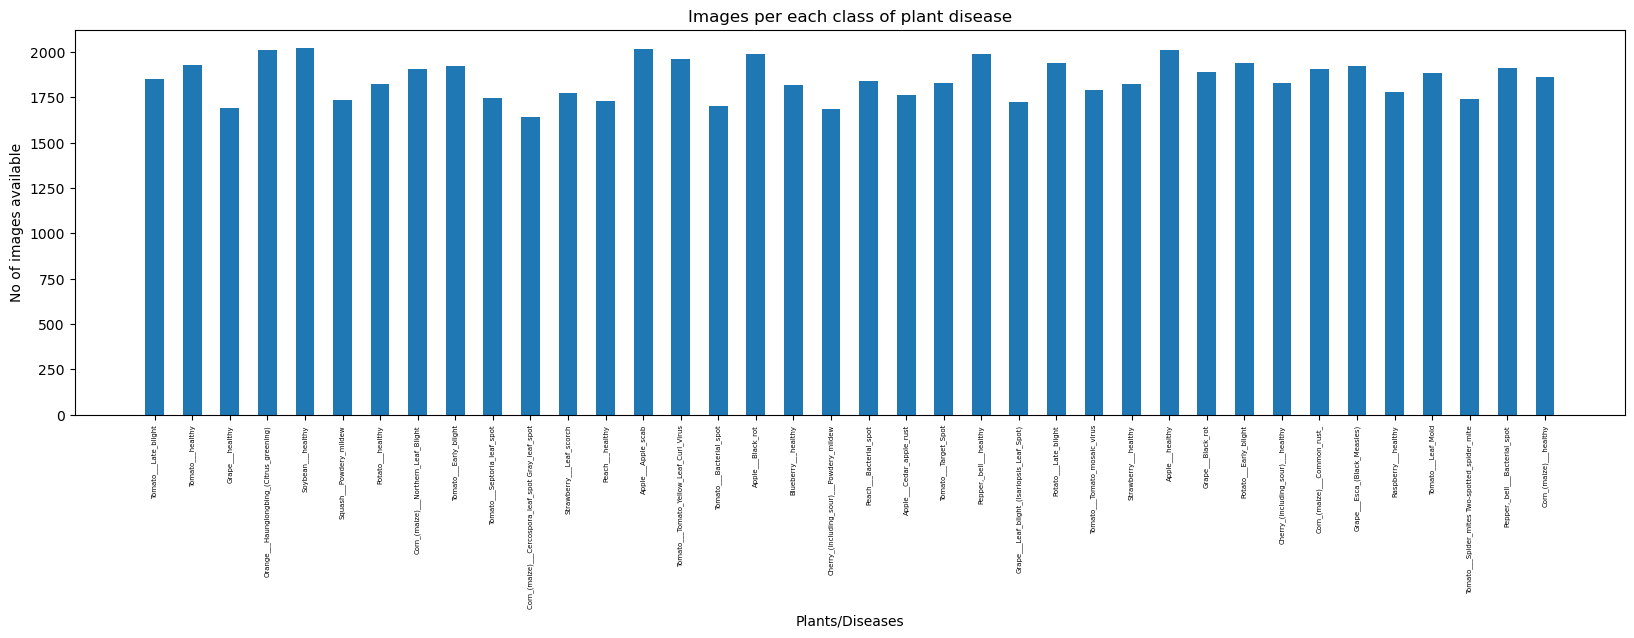

In [6]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.5)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()

validation_datagen = ImageDataGenerator(
    validation_split=0.5
)
#DATA:
train_set = train_datagen.flow_from_directory(
          train_dir,
          target_size=(256,256),
          batch_size=32,
          seed=101, 
          shuffle=True,
          class_mode='categorical',
          )

test_set = validation_datagen.flow_from_directory(
          valid_dir,
          target_size=(256,256),
          batch_size=32,
          shuffle=False,
          # seed=101,
          class_mode='categorical',
          subset = "training")

validation_set = validation_datagen.flow_from_directory(
          valid_dir,
          target_size=(256,256),
          batch_size=32,
          shuffle=True,
          # seed=101,
          class_mode='categorical',
          subset = "validation")

Found 70295 images belonging to 38 classes.
Found 8795 images belonging to 38 classes.
Found 8777 images belonging to 38 classes.


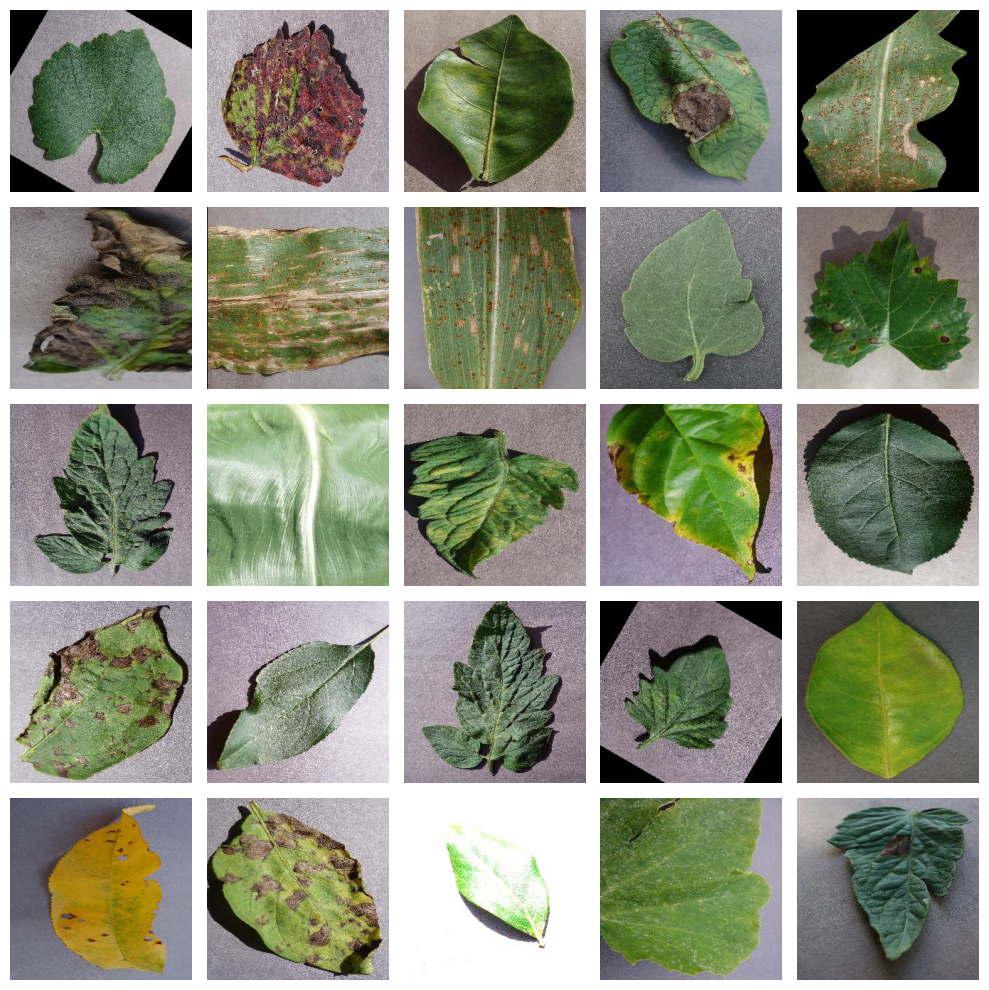

In [8]:
sample_training_images, _ = next(train_set)
def plotImages(images_arr):
    fig, axes = plt.subplots(5, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
      
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images)

In [9]:
def create_model(input_shape=(256, 256, 3), num_classes=38):
    model = Sequential()
    
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
    
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.Conv2D(256, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
    
    model.add(tf.keras.layers.Conv2D(512, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
    
    model.add(tf.keras.layers.Conv2D(512, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.Conv2D(512, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("relu"))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))
    
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 256, 256, 128)     0

In [11]:
from tensorflow_addons.optimizers import CyclicalLearningRate
cyclical_learning_rate = CyclicalLearningRate(
 initial_learning_rate=3e-7,
 maximal_learning_rate=0.001,
 step_size=len(train_set),
 scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
 scale_mode='cycle')

In [12]:
path = r''
checkpoint_filepath = path  + 'weights.{epoch:02d}-{val_accuracy:.2f}.tf'
model_checkpoint_callback = [
    tf.keras.callbacks.ModelCheckpoint(
                                      filepath=checkpoint_filepath,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,save_format='tf' ) 
    ,

    tf.keras.callbacks.EarlyStopping(
                                  monitor='val_accuracy', min_delta=0,
                                  patience=10, verbose=2, mode='auto',
                                  baseline=None, restore_best_weights=True)
    ]
optimizer = tf.keras.optimizers.Adam(learning_rate = cyclical_learning_rate, clipvalue=0.1)
                                 
model.compile(loss="categorical_crossentropy",
                  optimizer =optimizer, metrics=["accuracy"])

In [13]:
tf.random.set_seed(7)
history = model.fit_generator(train_set, validation_data = validation_set,epochs = 300,steps_per_epoch=2197 , callbacks=[model_checkpoint_callback])

Epoch 1/300


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


2197/2197 [==============================] - 579s 260ms/step - loss: 0.7216 - accuracy: 0.7945 - val_loss: 1.6217 - val_accuracy: 0.6339
Epoch 2/300
2197/2197 [==============================] - 500s 228ms/step - loss: 0.1166 - accuracy: 0.9623 - val_loss: 0.0286 - val_accuracy: 0.9907
Epoch 3/300
2197/2197 [==============================] - 495s 225ms/step - loss: 0.0810 - accuracy: 0.9738 - val_loss: 2.1252 - val_accuracy: 0.5920
Epoch 4/300
2197/2197 [==============================] - 500s 228ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0147 - val_accuracy: 0.9951
Epoch 5/300
2197/2197 [==============================] - 497s 226ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.2385 - val_accuracy: 0.9335
Epoch 6/300
2197/2197 [==============================] - 495s 225ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0111 - val_accuracy: 0.9959
Epoch 7/300
2197/2197 [==============================] - 498s 227ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss:

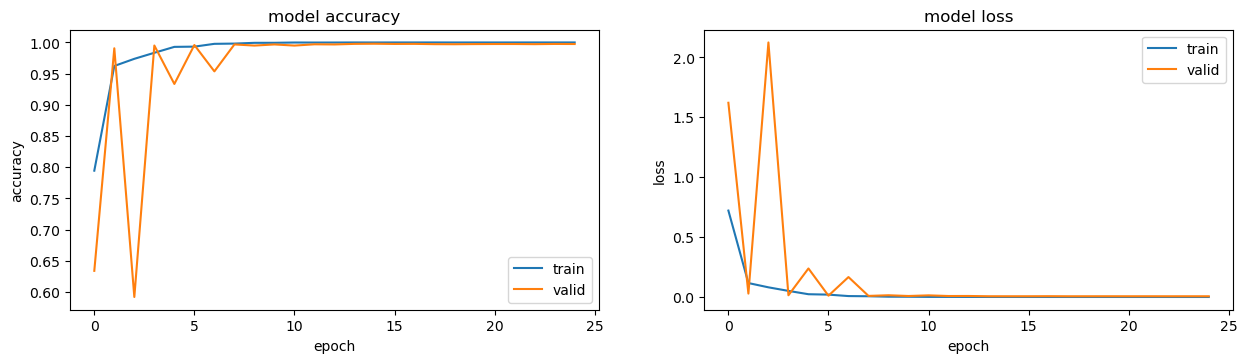

In [14]:
plt.figure(1, figsize = (15,8)) 
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
plt.show()

In [15]:
scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

275/275 [==============================] - 52s 189ms/step - loss: 0.0096 - accuracy: 0.9977
loss: 0.96%


In [16]:
metrics=[
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.SpecificityAtSensitivity(0.5 ,name="spe"),
    tf.keras.metrics.SensitivityAtSpecificity(0.5 ,name="sen"),
    "accuracy"
] 

optimizer = tf.keras.optimizers.Adam(learning_rate = cyclical_learning_rate, clipvalue=0.1)
                                
model.compile(loss="categorical_crossentropy", metrics=metrics, optimizer="Adam")
evaluation = model.evaluate(test_set)
dict_metrics = {}
for i, m in enumerate(model.metrics_names):
    print(m, evaluation[i])
    dict_metrics[m] = evaluation[i]
precision  = dict_metrics["precision"]
recall = dict_metrics["recall"]

f1_score = 2 * (precision * recall) / (precision + recall)
print("f1_score ",f1_score)
dict_metrics["f1_score"] = f1_score

275/275 [==============================] - 32s 113ms/step - loss: 0.0096 - recall: 0.9977 - precision: 0.9977 - tp: 8775.0000 - tn: 325395.0000 - fn: 20.0000 - fp: 20.0000 - spe: 1.0000 - sen: 0.9995 - accuracy: 0.9977
loss 0.009642439894378185
recall 0.9977259635925293
precision 0.9977259635925293
tp 8775.0
tn 325395.0
fn 20.0
fp 20.0
spe 0.9999938607215881
sen 0.9995452165603638
accuracy 0.9977259635925293
f1_score  0.9977259635925293


In [17]:
model.save('plantDiseaseDetectionModel.h5')